In [1]:
import numpy as np
import torch
import sys
sys.path.append('../')
from utils.util import *
from model import *
import matplotlib.pyplot as plt
from matplotlib import rcParams

configs = {
    "font.size": 15
}

rcParams.update(configs)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def load_source(source):
    x_list = []
    y_list = []
    
    for i in source:
        x =np.load(f'../dataset/A{i:003}/x.npy')
        y =np.load(f'../dataset/A{i:003}/y.npy')
        x_list.append(x)
        y_list.append(y)

    x = np.concatenate(x_list, axis=0)
    y = np.concatenate(y_list, axis=0)
    
    # x = x[:, :, 768: 1536, 256:]
    x = x / 255
        
    return x, y

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load model
model = AutoEncoder().to(device)
model.load_state_dict(torch.load("../save_model/3/best_model.pth"))

train_source = [3]
val_source = [3]
test_source = [3]

# load data
test_x, test_y = load_source(test_source)

new_indices = np.argsort(test_y)
test_x = test_x[new_indices]
test_y = test_y[new_indices]

print('test_x:', test_x.shape, 'test_y:', test_y.shape)




test_x: (56, 2, 640, 320) test_y: (56,)


In [3]:
# get the data
inputs, labels = torch.tensor(test_x, dtype=torch.float32).to(device), torch.tensor(test_y, dtype=torch.float32).to(device)

# get the prediction
outputs = model(inputs)
print(outputs.shape)

torch.Size([56, 2, 640, 320])


In [4]:
original_x = inputs.cpu().detach().numpy()
reconstructed_x = outputs.cpu().detach().numpy()

original_x = original_x * 255.0
reconstructed_x = reconstructed_x * 255.0

# print(reconstructed_x)

o_x_1 = original_x[0, 0, :, :]
r_x_1 = reconstructed_x[0, 0, :, :]

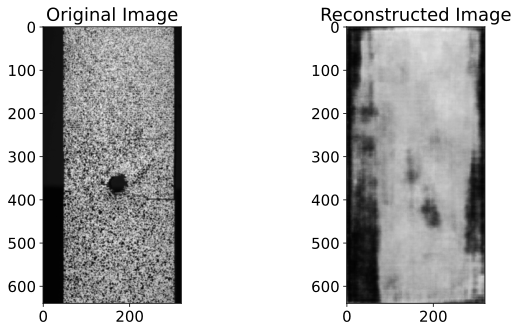

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(o_x_1, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(r_x_1, cmap='gray')
axes[1].set_title('Reconstructed Image')
plt.show()